In [1]:
%reset -f
import numpy as np
import time
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(1)

In [3]:
#Read the data
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter = ",")
print(dataset.shape)
print(dataset)

(768, 9)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [4]:
#Split int to input(X) and output (Y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [5]:
model = models.Sequential()

# No choice for the input dimension, it must be 8 because of 8 parameters
model.add(layers.Dense(12,activation = 'relu',input_dim = 8))
model.add(layers.Dense(8, activation = 'relu', kernel_initializer = "uniform"))
# model

model.add(layers.Dense(1, kernel_initializer = "uniform", activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics =  'accuracy')
hist = model.fit(X,y,epochs = 100, batch_size = 10,validation_split = 0.33)
print(hist.history.keys())

Epoch 1/100
52/52 [==============================] - 2s 24ms/step - loss: 0.6858 - accuracy: 0.5448 - val_loss: 0.6526 - val_accuracy: 0.6732
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.6242 - val_loss: 0.6412 - val_accuracy: 0.6811
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6140 - val_loss: 0.6279 - val_accuracy: 0.6654
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.6233 - val_loss: 0.6202 - val_accuracy: 0.6811
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6260 - val_loss: 0.6167 - val_accuracy: 0.6732
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6098 - accuracy: 0.6794 - val_loss: 0.6184 - val_accuracy: 0.6614
Epoch 7/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6820 - val_loss: 0.6105 - val_accuracy: 0.6693
Epoch 8/100


Epoch 59/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5686 - accuracy: 0.7114 - val_loss: 0.5457 - val_accuracy: 0.7126
Epoch 60/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5767 - accuracy: 0.7094 - val_loss: 0.5476 - val_accuracy: 0.7087
Epoch 61/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5420 - accuracy: 0.7208 - val_loss: 0.5369 - val_accuracy: 0.7244
Epoch 62/100
52/52 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7123 - val_loss: 0.5451 - val_accuracy: 0.7087
Epoch 63/100
52/52 [==============================] - 0s 7ms/step - loss: 0.5477 - accuracy: 0.7294 - val_loss: 0.5640 - val_accuracy: 0.7008
Epoch 64/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5679 - accuracy: 0.7005 - val_loss: 0.5577 - val_accuracy: 0.6929
Epoch 65/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7395 - val_loss: 0.5423 - val_accuracy: 0.7283
Epoch 

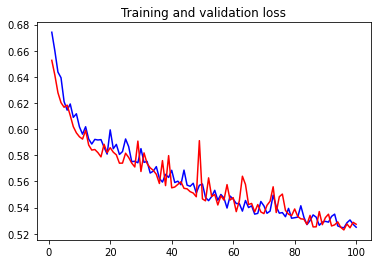

In [7]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()

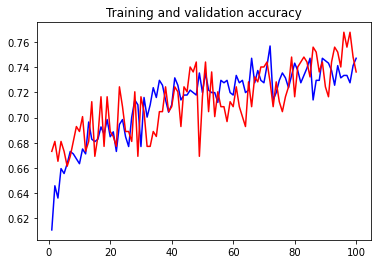

In [9]:
train_acc = hist.history['accuracy']
valid_acc = hist.history['val_accuracy']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_acc,'b-')
plt.plot(ep,valid_acc,'r-')
plt.title('Training and validation accuracy')
plt.show()